In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, auc, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics

In [74]:
df_sissi = pd.DataFrame(pd.read_excel("/run/media/stefanre/CA6415EC6415DC4F/Masterarbeit/2.Versuch/Native_Data/RNA-FM_Excel/native.xlsx"))
df_sissiz_mono = pd.DataFrame(pd.read_excel("/run/media/stefanre/CA6415EC6415DC4F/Masterarbeit/2.Versuch/Native_Data/RNA-FM_Excel//sissiz_mono.xlsx"))
df_sissiz_di = pd.DataFrame(pd.read_excel("/run/media/stefanre/CA6415EC6415DC4F/Masterarbeit/2.Versuch/Native_Data/RNA-FM_Excel//sissiz_di.xlsx"))
df_multiperm_mono = pd.DataFrame(pd.read_excel("/run/media/stefanre/CA6415EC6415DC4F/Masterarbeit/2.Versuch/Native_Data/RNA-FM_Excel//multiperm_mono.xlsx"))
df_multiperm_di = pd.DataFrame(pd.read_excel("/run/media/stefanre/CA6415EC6415DC4F/Masterarbeit/2.Versuch/Native_Data/RNA-FM_Excel//multiperm_di.xlsx"))
df_aln_shuffle = pd.DataFrame(pd.read_excel("/run/media/stefanre/CA6415EC6415DC4F/Masterarbeit/2.Versuch/Native_Data/RNA-FM_Excel//alifoldz.xlsx"))

In [75]:
# df_sissi = pd.DataFrame(pd.read_excel("D:/Masterarbeit/2.Versuch/Data/RNA-FM_Excel/sissi.xlsx"))
# df_sissiz_mono = pd.DataFrame(pd.read_excel("D:/Masterarbeit/2.Versuch/Data/RNA-FM_Excel/sissiz_mono.xlsx"))
# df_sissiz_di = pd.DataFrame(pd.read_excel("D:/Masterarbeit/2.Versuch/Data/RNA-FM_Excel/sissiz_di.xlsx"))
# df_multiperm_mono = pd.DataFrame(pd.read_excel("D:/Masterarbeit/2.Versuch/Data/RNA-FM_Excel/multiperm_mono.xlsx"))
# df_multiperm_di = pd.DataFrame(pd.read_excel("D:/Masterarbeit/2.Versuch/Data/RNA-FM_Excel/multiperm_di.xlsx"))
# df_aln_shuffle = pd.DataFrame(pd.read_excel("D:/Masterarbeit/2.Versuch/Data/RNA-FM_Excel/alifoldz.xlsx"))

In [76]:
# df_sissi = pd.DataFrame(pd.read_excel("C:/bla/Waste/MA/2.Versuch/RNA-FM_Excel/sissi.xlsx"))
# df_sissiz_mono = pd.DataFrame(pd.read_excel("C:/bla/Waste/MA/2.Versuch/RNA-FM_Excel/sissiz_mono.xlsx"))
# df_sissiz_di = pd.DataFrame(pd.read_excel("C:/bla/Waste/MA/2.Versuch/RNA-FM_Excel/sissiz_di.xlsx"))
# df_multiperm_mono = pd.DataFrame(pd.read_excel("C:/bla/Waste/MA/2.Versuch/RNA-FM_Excel/multiperm_mono.xlsx"))
# df_multiperm_di = pd.DataFrame(pd.read_excel("C:/bla/Waste/MA/2.Versuch/RNA-FM_Excel/multiperm_di.xlsx"))
# df_aln_shuffle = pd.DataFrame(pd.read_excel("C:/bla/Waste/MA/2.Versuch/RNA-FM_Excel/alifoldz.xlsx"))

In [77]:
# df_sissi = (df_sissi.groupby('ParentFolder')['Score'].median().round(2))
# df_sissiz_mono = (df_sissiz_mono.groupby('ParentFolder')['Score'].median().round(2))
# df_sissiz_di = (df_sissiz_di.groupby('ParentFolder')['Score'].median().round(2))
# df_multiperm_mono = (df_multiperm_mono.groupby('ParentFolder')['Score'].median().round(2))
# df_multiperm_di = (df_multiperm_di.groupby('ParentFolder')['Score'].median().round(2))
# df_aln_shuffle = (df_aln_shuffle.groupby('ParentFolder')['Score'].median().round(2))

# df_sissi = pd.DataFrame(df_sissi)
# df_sissiz_mono = pd.DataFrame(df_sissiz_mono)
# df_sissiz_di = pd.DataFrame(df_sissiz_di)
# df_multiperm_mono = pd.DataFrame(df_multiperm_mono)
# df_multiperm_di = pd.DataFrame(df_multiperm_di)
# df_aln_shuffle = pd.DataFrame(df_aln_shuffle)

# df_sissi


In [78]:
filter = 75
df_sissi_filterd = df_sissi[(df_sissi['Score'] >= -filter) & (df_sissi['Score'] <= filter)]
df_sissiz_mono_filterd = df_sissiz_mono[(df_sissiz_mono['Score'] >= -filter) & (df_sissiz_mono['Score'] <= filter)]
df_sissiz_di_filterd = df_sissiz_di[(df_sissiz_di['Score'] >= -filter) & (df_sissiz_di['Score'] <= filter)]
df_multiperm_mono_filterd = df_multiperm_mono[(df_multiperm_mono['Score'] >= -filter) & (df_multiperm_mono['Score'] <= filter)]
df_multiperm_di_filterd = df_multiperm_di[(df_multiperm_di['Score'] >= -filter) & (df_multiperm_di['Score'] <= filter)]
df_aln_shuffle_filterd = df_aln_shuffle[(df_aln_shuffle['Score'] >= -filter) & (df_aln_shuffle['Score'] <= filter)]

In [79]:
df_sissi[['Score']].describe()

,Score
count,5634.000000
mean,24355.368033
std,56875.529302
min,-60.800000
25%,-4.000000
50%,5.030000
75%,18.775000
max,500034.470000


In [80]:
df_sissiz_mono[['Score']].describe()

,Score
count,2002.000000
mean,26829.503167
std,47891.764474
min,-41.100000
25%,1.412500
50%,9.600000
75%,99983.400000
max,300055.470000


In [81]:
df_sissiz_di[['Score']].describe()

,Score
count,2002.000000
mean,20285.712982
std,46876.100463
min,-36.500000
25%,0.100000
50%,7.400000
75%,20.675000
max,400037.840000


In [82]:
df_multiperm_mono[['Score']].describe()

,Score
count,5635.000000
mean,19205.605466
std,41795.582445
min,-46.900000
25%,0.000000
50%,5.950000
75%,15.805000
max,399993.530000


In [83]:
df_multiperm_di[['Score']].describe()

,Score
count,5635.000000
mean,23677.602944
std,47816.575211
min,-41.700000
25%,0.000000
50%,6.330000
75%,21.505000
max,600013.560000


In [84]:
df_aln_shuffle[['Score']].describe()

,Score
count,2691.000000
mean,36349.156845
std,68893.475424
min,-31.980000
25%,-3.000000
50%,6.700000
75%,99999.000000
max,500017.030000


In [85]:
def createResultsFromExcel(dataframes):
    labels = ['Native', 'SISSIz_mono', 'SISSIz_di', 'Multiperm_mono', 'Multiperm_di', 'aln-shuffle']
    data = [df['Score'] for df in dataframes]
    thresholds = [0]

    plt.figure(figsize=(12, 8))
    plt.boxplot(data, labels=labels)

    for t in thresholds:
        plt.axhline(y=t, color='red', linestyle='--', linewidth=1)

    plt.axvspan(0.5, 1.5, color="darkgray", alpha=0.75, edgecolor="black", label='Positive Samples')
    plt.axvspan(1.5, 3.5, color="sandybrown", alpha=0.75, edgecolor="black", label='Simulation')
    plt.axvspan(3.5, 6.5, color="mediumpurple", alpha=0.75, edgecolor="black", label='Shuffle')

    plt.title('Boxplot RNA-FM with RNAeval Score')
    plt.legend()
    plt.show()

/tmp/ipykernel_36586/3326904036.py:12: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(0.5, 1.5, color="darkgray", alpha=0.75, edgecolor="black", label='Positive Samples')
/tmp/ipykernel_36586/3326904036.py:13: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(1.5, 3.5, color="sandybrown", alpha=0.75, edgecolor="black", label='Simulation')
/tmp/ipykernel_36586/3326904036.py:14: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(3.5, 6.5, color="mediumpurple", alpha=0.75, edgecolor="black", label='Shuffle')


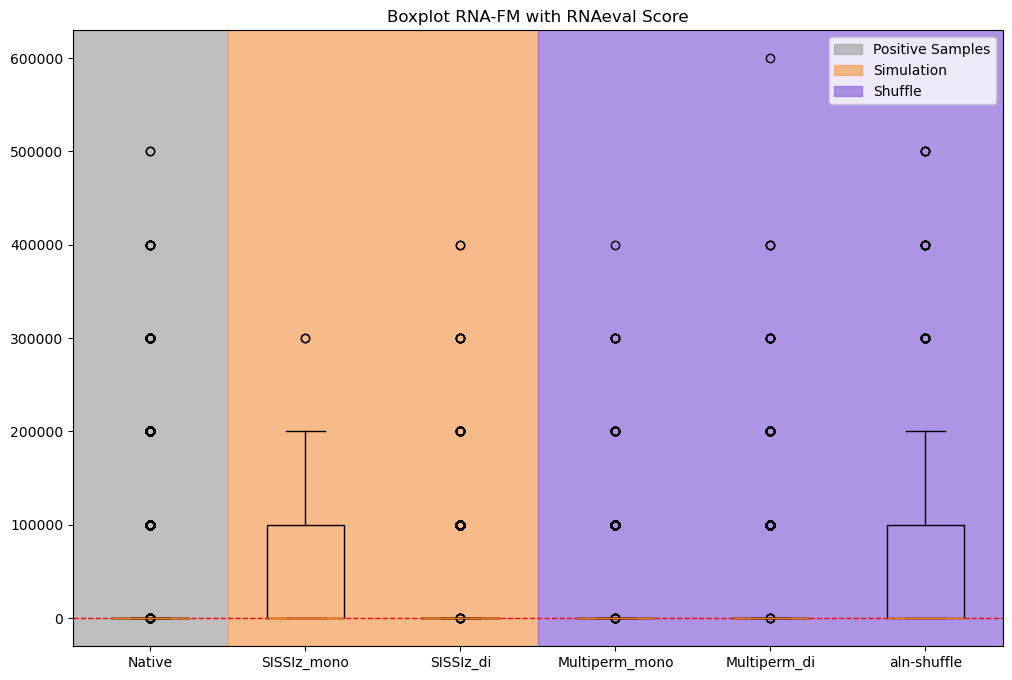

In [86]:
createResultsFromExcel([df_sissi, df_sissiz_mono, df_sissiz_di, df_multiperm_mono, df_multiperm_di, df_aln_shuffle])    

/tmp/ipykernel_36586/3326904036.py:12: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(0.5, 1.5, color="darkgray", alpha=0.75, edgecolor="black", label='Positive Samples')
/tmp/ipykernel_36586/3326904036.py:13: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(1.5, 3.5, color="sandybrown", alpha=0.75, edgecolor="black", label='Simulation')
/tmp/ipykernel_36586/3326904036.py:14: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(3.5, 6.5, color="mediumpurple", alpha=0.75, edgecolor="black", label='Shuffle')


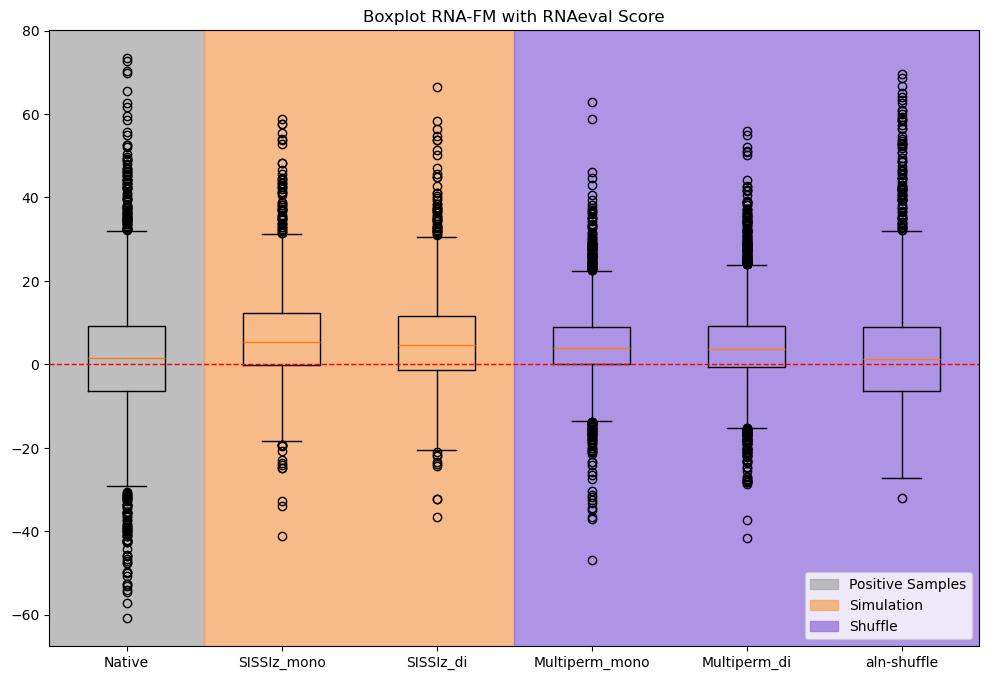

In [87]:
createResultsFromExcel([df_sissi_filterd, df_sissiz_mono_filterd, df_sissiz_di_filterd, df_multiperm_mono_filterd, df_multiperm_di_filterd, df_aln_shuffle_filterd])